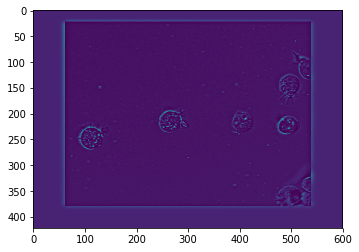

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('space.jpg',-1)
img = np.float32(img)
img = img/255
# plt.imshow(img)
rows,cols,dim=img.shape

rh, rl, cutoff = 2.5,0.5,32

imgYCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
y,cr,cb = cv2.split(imgYCrCb)

y_log = np.log(y+0.01)

y_fft = np.fft.fft2(y_log)

y_fft_shift = np.fft.fftshift(y_fft)


DX = cols/cutoff
G = np.ones((rows,cols))
for i in range(rows):
    for j in range(cols):
        G[i][j]=((rh-rl)*(1-np.exp(-((i-rows/2)**2+(j-cols/2)**2)/(2*DX**2))))+rl

result_filter = G * y_fft_shift

result_interm = np.real(np.fft.ifft2(np.fft.ifftshift(result_filter)))

result = np.exp(result_interm)
plt.imshow(result)

In [2]:
cv2.imwrite('space_homomorphic.jpg',result)

True